In [125]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
## you might install some packages (uncomment the following lines).
# !pip install numpy
# !pip install matplotlib
# !pip install wordcloud 

In [126]:
#reading the data
data = pd.read_csv("c:/Users/migle/Desktop/BPR/IPWFormAi/data/all_data.csv", on_bad_lines='skip')
display(data)

,Kunde,customname,customform,name,fieldobjectid,fieldparentid,fieldparenttype,elementtype,fieldtype,blocktype,specialtype,fieldrelation,fieldlabel,language
0,abinventech,form876,876,Kundereklamation,877,878.0,customformelement,field,listselect,NaN,NaN,form2488,Vælg kunde,DA
1,abinventech,form876,876,Kundereklamation,878,NaN,customform,block,NaN,layout_fieldset,NaN,NaN,Kundeoplysninger,DA
2,abinventech,form876,876,Kundereklamation,879,878.0,customformelement,field,string,NaN,NaN,NaN,Gadenavn,DA
3,abinventech,form876,876,Kundereklamation,880,878.0,customformelement,field,string,NaN,NaN,NaN,Postnr,DA
4,abinventech,form876,876,Kundereklamation,881,878.0,customformelement,field,string,NaN,NaN,NaN,By,DA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10331,ipw,form1927875,1927875,Azure - Udløb af client secret,2610308,2592044.0,customformelement,special,NaN,NaN,createdby,NaN,Ansvarlig for opsætning,DA
10332,ipw,form1329139,1329139,Leverancer,2612534,NaN,customform,block,NaN,layout_fieldset,NaN,NaN,UDGÅET felter,DA
10333,ipw,form1329139,1329139,Leverancer,2612540,1361554.0,customformelement,special,NaN,NaN,layout_text,NaN,Installationen oprettes på domænet xxxx.ipw.dk,DA
10334,ipw,form1329139,1329139,Leverancer,2612546,1361554.0,customformelement,special,NaN,NaN,layout_text,NaN,Installationen oprettes på domænet <b>xxxx.ipw...,DA


In the following section, we will explore the distribution of missing values and apply appropriate techniques to handle them effectively.

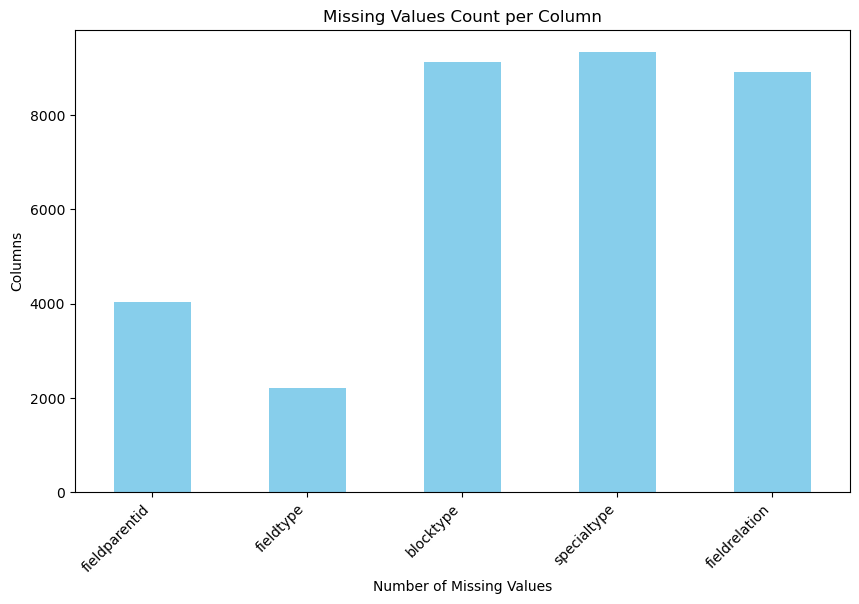

In [127]:
# Bar plot of missing values per column
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter out columns without missing values

plt.figure(figsize=(10,6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count per Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.show()


The "Block" element type is purely a front-end style used to group elements.
After consulting with the company, we decided to exclude it from the project, so it will be removed.

In [128]:
# Remove all elements of type block.(maybe late include it)
indices_to_drop = data[data['elementtype'] == 'block'].index

# Drop those indices
data = data.drop(indices_to_drop)
display(data)

,Kunde,customname,customform,name,fieldobjectid,fieldparentid,fieldparenttype,elementtype,fieldtype,blocktype,specialtype,fieldrelation,fieldlabel,language
0,abinventech,form876,876,Kundereklamation,877,878.0,customformelement,field,listselect,NaN,NaN,form2488,Vælg kunde,DA
2,abinventech,form876,876,Kundereklamation,879,878.0,customformelement,field,string,NaN,NaN,NaN,Gadenavn,DA
3,abinventech,form876,876,Kundereklamation,880,878.0,customformelement,field,string,NaN,NaN,NaN,Postnr,DA
4,abinventech,form876,876,Kundereklamation,881,878.0,customformelement,field,string,NaN,NaN,NaN,By,DA
5,abinventech,form876,876,Kundereklamation,882,878.0,customformelement,field,string,NaN,NaN,NaN,Telefonnummer,DA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,ipw,form10274,2386659,Intern IT Support,2601947,2386665.0,customformelement,special,NaN,NaN,layout_text,NaN,"Registrerer du tid, kan du bruge flg. opg.nr: ...",DA
10331,ipw,form1927875,1927875,Azure - Udløb af client secret,2610308,2592044.0,customformelement,special,NaN,NaN,createdby,NaN,Ansvarlig for opsætning,DA
10333,ipw,form1329139,1329139,Leverancer,2612540,1361554.0,customformelement,special,NaN,NaN,layout_text,NaN,Installationen oprettes på domænet xxxx.ipw.dk,DA
10334,ipw,form1329139,1329139,Leverancer,2612546,1361554.0,customformelement,special,NaN,NaN,layout_text,NaN,Installationen oprettes på domænet <b>xxxx.ipw...,DA


The company categorizes elements into three types:
    -formfield.
    -special.
    -block.
    
We have decided to remove the "block" type.

For "special" elements, the actual type is stored in the specialtype field. Since these elements have specific settings, we will transfer their type from specialtype to fieldtype and mark them as special. Predicting these elements will automatically indicate their special status in the company.

In [129]:
# If the element is special the actual fieldtype is in specialtype
# We will exclude element types.

#none since logic to do it.
data['isspecial'] = data['elementtype'].apply(lambda x: 1 if x == 'special' else 0)

for index, row in data.iterrows():
    if row['isspecial'] == 1:
        if pd.notnull(row['fieldtype']):  # Check if 'fieldtype' is already filled
            print(f"Row {index}: 'fieldtype' already has a value before assigning 'specialtype'")
        else:
            # If 'fieldtype' is empty, assign the value from 'specialtype'
            data.at[index, 'fieldtype'] = row['specialtype']

display(data)

,Kunde,customname,customform,name,fieldobjectid,fieldparentid,fieldparenttype,elementtype,fieldtype,blocktype,specialtype,fieldrelation,fieldlabel,language,isspecial
0,abinventech,form876,876,Kundereklamation,877,878.0,customformelement,field,listselect,NaN,NaN,form2488,Vælg kunde,DA,0
2,abinventech,form876,876,Kundereklamation,879,878.0,customformelement,field,string,NaN,NaN,NaN,Gadenavn,DA,0
3,abinventech,form876,876,Kundereklamation,880,878.0,customformelement,field,string,NaN,NaN,NaN,Postnr,DA,0
4,abinventech,form876,876,Kundereklamation,881,878.0,customformelement,field,string,NaN,NaN,NaN,By,DA,0
5,abinventech,form876,876,Kundereklamation,882,878.0,customformelement,field,string,NaN,NaN,NaN,Telefonnummer,DA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10330,ipw,form10274,2386659,Intern IT Support,2601947,2386665.0,customformelement,special,layout_text,NaN,layout_text,NaN,"Registrerer du tid, kan du bruge flg. opg.nr: ...",DA,1
10331,ipw,form1927875,1927875,Azure - Udløb af client secret,2610308,2592044.0,customformelement,special,createdby,NaN,createdby,NaN,Ansvarlig for opsætning,DA,1
10333,ipw,form1329139,1329139,Leverancer,2612540,1361554.0,customformelement,special,layout_text,NaN,layout_text,NaN,Installationen oprettes på domænet xxxx.ipw.dk,DA,1
10334,ipw,form1329139,1329139,Leverancer,2612546,1361554.0,customformelement,special,layout_text,NaN,layout_text,NaN,Installationen oprettes på domænet <b>xxxx.ipw...,DA,1


The following columns will be removed as they are not relevant to the form structure:

    -Kunde: The customer's name.
    -elementtype: Already addressed.
    -customname: The class name in the code.
    -fieldobjectid.
    -fieldparentid: If the element is in a block, it has the block ID as the parent; otherwise, it's the form itself.
    -blocktype.
    -fieldrelation: Indicates element relationships, but we will remove it for now.
    -language.
    -specialtype: Already transferred to fieldtype.
    -special: Special elements have already been marked. (Ask the teacher for confirmation).

In [130]:
#Drop non-relevant columns.
data = data.drop(columns=['Kunde','isspecial','elementtype', 'customname','fieldobjectid','fieldparentid','fieldparenttype','blocktype','fieldrelation','language','specialtype'])
data.head()


,customform,name,fieldtype,fieldlabel
0,876,Kundereklamation,listselect,Vælg kunde
2,876,Kundereklamation,string,Gadenavn
3,876,Kundereklamation,string,Postnr
4,876,Kundereklamation,string,By
5,876,Kundereklamation,string,Telefonnummer


we will check if "fieldlabel" is catagorical.

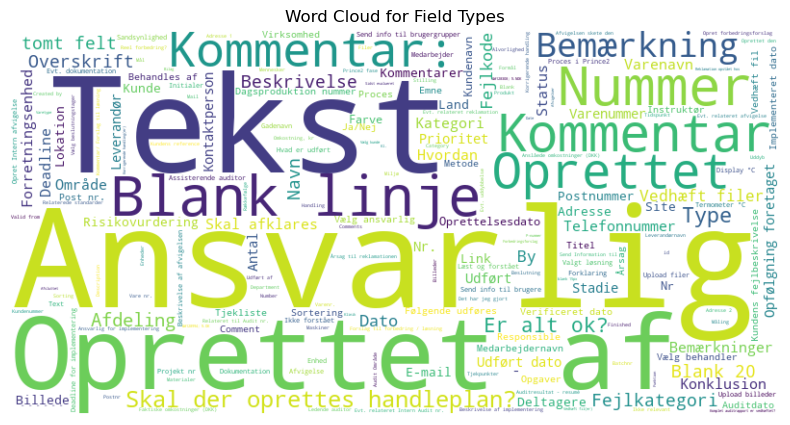

In [131]:
# Check if fieldtype is catagorical.
fieldtype = data['fieldlabel'].value_counts()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fieldtype)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Field Types')
plt.show()

We can see that there is some repretitiveness in the fieldlabels that are used to describe the fields, which is very promising in terms of future model building.

Check if thier null values after now and print the output.

In [132]:
# Check for missing values in each column
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Print missing values if any
if missing_values.empty:
    print("There are no missing values in the dataset.")
else:
    print("Missing values found:")
    print(missing_values)



There are no missing values in the dataset.


Since fieldtype is categorical we will pivot them and group them by the form id and name.
We are using the "customform" which is the id of the form(we cannot group them by name can be used several times).
We cannot use onehot encoder because the form can have more that elements from the same type.

In [133]:
# Create a pivot table to count occurrences of fieldtype for each customform
field_type_counts = data.pivot_table(
    index=['customform', 'name'],  # Include 'name'
    columns='fieldtype',
    aggfunc='size',
    fill_value=0
).reset_index()

display(field_type_counts)

fieldtype,customform,name,attachfile,autonum,autonumpre,businessunit,changed,changedby,checkbox,colorpicker,...,riskmatrix,standards,state,string,text,texthistory,url,userrelation,userrelation_multiple,versionnumber
0,770,Projektportefølje,0,1,0,0,0,0,7,0,...,0,0,0,1,10,0,0,3,1,0
1,775,Projektområde,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,876,Claims,0,1,0,0,0,0,0,0,...,0,0,0,2,11,0,0,2,0,0
3,876,Kundereklamation,0,8,0,0,0,0,0,0,...,0,0,0,86,22,1,0,10,8,0
4,876,Reklamation,0,2,0,0,0,0,0,0,...,0,0,0,24,16,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,2584010,Formularkatalog,0,0,0,0,1,1,1,0,...,0,0,0,2,5,0,1,0,0,0
855,2584018,Formularkatalog - Kategori,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
856,2584251,Formularkatalog - Øvrige vurderinger,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,0
857,2584255,Formularkatalog - Vurderingsskala,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will create "total-elements" which it refers to the amount of the elements in the form.

In [134]:
# Count elements in each form in total.
field_type_counts['total_elements'] = field_type_counts.loc[:, field_type_counts.columns.isin(['name', 'customform']) == False].sum(axis=1)
display(field_type_counts)

fieldtype,customform,name,attachfile,autonum,autonumpre,businessunit,changed,changedby,checkbox,colorpicker,...,standards,state,string,text,texthistory,url,userrelation,userrelation_multiple,versionnumber,total_elements
0,770,Projektportefølje,0,1,0,0,0,0,7,0,...,0,0,1,10,0,0,3,1,0,30
1,775,Projektområde,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,876,Claims,0,1,0,0,0,0,0,0,...,0,0,2,11,0,0,2,0,0,37
3,876,Kundereklamation,0,8,0,0,0,0,0,0,...,0,0,86,22,1,0,10,8,0,246
4,876,Reklamation,0,2,0,0,0,0,0,0,...,0,0,24,16,1,1,3,1,0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,2584010,Formularkatalog,0,0,0,0,1,1,1,0,...,0,0,2,5,0,1,0,0,0,24
855,2584018,Formularkatalog - Kategori,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
856,2584251,Formularkatalog - Øvrige vurderinger,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,1,0,0,4
857,2584255,Formularkatalog - Vurderingsskala,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [135]:
data['total_elements'] = field_type_counts['total_elements']

display(data)

,customform,name,fieldtype,fieldlabel,total_elements
0,876,Kundereklamation,listselect,Vælg kunde,30.0
2,876,Kundereklamation,string,Gadenavn,37.0
3,876,Kundereklamation,string,Postnr,246.0
4,876,Kundereklamation,string,By,91.0
5,876,Kundereklamation,string,Telefonnummer,206.0
...,...,...,...,...,...
10330,2386659,Intern IT Support,layout_text,"Registrerer du tid, kan du bruge flg. opg.nr: ...",NaN
10331,1927875,Azure - Udløb af client secret,createdby,Ansvarlig for opsætning,NaN
10333,1329139,Leverancer,layout_text,Installationen oprettes på domænet xxxx.ipw.dk,NaN
10334,1329139,Leverancer,layout_text,Installationen oprettes på domænet <b>xxxx.ipw...,NaN


Save preprocessed data to a CSV file that can later be used on building models

In [139]:
data = data[data['total_elements'] != 1]
data = data.dropna()

data.to_csv("c:/Users/migle/Desktop/BPR/IPWFormAi/data/preprocessed_data.csv", index=False)

display(data)

,customform,name,fieldtype,fieldlabel,total_elements
0,876,Kundereklamation,listselect,Vælg kunde,30.0
2,876,Kundereklamation,string,Gadenavn,37.0
3,876,Kundereklamation,string,Postnr,246.0
4,876,Kundereklamation,string,By,91.0
5,876,Kundereklamation,string,Telefonnummer,206.0
...,...,...,...,...,...
849,37240,[Leverandør-/kundekort] Certifikat / Kontrakt ...,date,Gældende til,2.0
852,37758,[Systemtabel] Dokumenttype,string,Dokumenttype,16.0
854,37218,Leverandør-/kundekort,combo,Leverandør status,24.0
856,33652,[Systemtabel] Evaluering - Bradley kurve,businessunit,Forretningsenhed,4.0
